<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/Lewis_ANN_classifyQwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-41-57cc3ff34e24>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


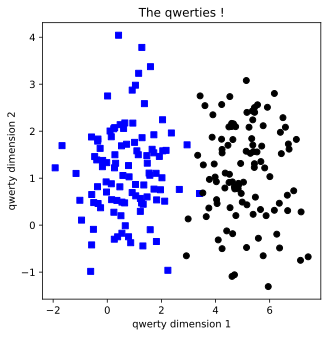

In [42]:
#Create the data

nPerClust = 100
blur = 1  #this is my standard diviation - shows spreadout the data value (individual data points) is from its cluster

#x , y center quartenants for the data cloud
# so A will be center with x= 1, and y = 1
# and B will be center with x=5, and y = 1
A = [1,1]
B = [5,1]

#Generate Data
#add random numbers to each element value in  vector A and B
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+ np.random.randn(nPerClust)*blur ]

#Creating the Category labels -dummy coded category labels - coverting to numbers
#one half of data is qwerty type ZEROS and the other half is qwerty type ONES
#this creates the categories
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

#here I'm stacking each vector into one data matrix (array) - concatenate into a matrix using T - Transpose
data_np = np.hstack((a,b)).T

#Convert to a pytorch tensor - a vector in pytorch
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties !')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [43]:
#Extra - Inspect data types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


A numpy array
class 'numpy.ndarray'>
(200, 2)

 A numpy array converted into a tensor (matrix)
 200 for individual data points
 2 refers to the x and y values
<class 'torch.Tensor'>
torch.Size([200, 2])

In [44]:
#Build the model

ANNclassify = nn.Sequential(
    nn.Linear(2,1),  #input layer  - two input features the x coordinate values and the y coordinate values - its two deminsional
    nn.ReLU(),       #activation unit
    nn.Linear(1,1),  #output unit
    nn.Sigmoid(),    #final activation unite(here the conceptual reasons, in practice)
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

output for ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)



In [45]:
#Other model features

learningRate = .01

#loss function  - not a MSE problem it is a Binary Cross Entropy loss
#BCE is Binary CE Loss

lossfun = nn.BCELoss()  # better to use BCEWithLogitsLoss more stable

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)


In [46]:
#Train the Model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  #compute Loss
  loss = lossfun(yHat, labels)
  losses[epochi]= loss

  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



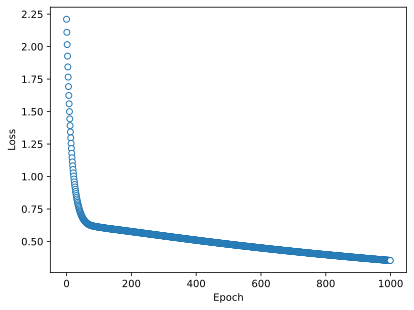

In [47]:
#Show the losses

plt.plot(losses.detach(),'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

here the graph shows the losses are going down over time 1000 training epochs
however, they have not reached a certain platue , the losses have not acentoted ?
so this mean the model needs more data to learn from, so I could
increase training epochs
increase the learning rate
modify the optimizer

Final accuracy: 93.5%


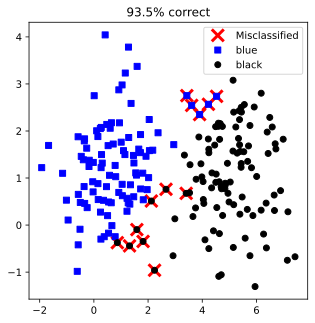

In [48]:
#Now Compute the Predictions

#manually compute losses
#final forward pass - here the model has been trained and the weights are set
#and I'll get the final predictions - which is the result of the Sigmoid function
#to get prelabels
#convert predictions numbers range from 0 - 1 into predictions of the Category
predictions = ANNclassify(data)

#here you'll see predictions ranging from 0 through 1
# print(predictions)

#will be a boolean where the predictions are greater than 5
#So the prelables contains Category 0 and Category 1
#here you'll see all true and false. if prediction is > than .5 then True
# elese if prediction is < than .5 False.    0 is False and 1 is True
predlabels = predictions > .5

# print(prelabels)

#find the errors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc= 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

#plot the labeled data

fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], 'bs')
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

# output shows 93.5 percent accuracy for categories
#

